<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>Artificial Intelligence and Machine Learning</center></font></h1>
<h1><center>Introduction to Computer Vision - Image Processing</center></h1>

<center><p float="center">
  <img src="https://i.ibb.co/DgY2LG0T/Gemini-Generated-Image-70bq2r70bq2r70bq.jpg" width="720"/>
</p></center>

<center><font size=6>Monkey Species Classification</font></center>

# Problem Statement

## Business Context

In recent years, habitat destruction, climate change, and poaching have led to the extinction of several monkey species, with many more now endangered. To support conservation efforts, a U.S.-based wildlife sanctuary is gathering a vast collection of images of endangered monkey species from different parts of the world. This initiative aims to improve research and protection strategies for these animals.  

However, sorting and identifying species within this extensive collection is a major challenge, as many look similar and the volume of data is overwhelming. Without an efficient way to categorize these images, it becomes difficult to track populations, analyze trends, and make informed conservation decisions.  

To address this, the sanctuary is working on ways to refine how these images are processed and analyzed. By improving how species are identified and classified, conservationists will be able to gain better insights, making it easier to monitor wildlife and strengthen protection efforts.

## Objective

Develop an image classification model using an Artificial Neural Network (ANN) to categorize endangered monkey species efficiently. By leveraging image preprocessing techniques, the model aims to improve classification accuracy while operating within the sanctuary’s resource constraints, ultimately enhancing conservation efforts.

## Data Description

-  Due to the large volume of data, the images were converted to the images.npy file and the labels are also placed in Labels.csv, allowing you to work on the data without being concerned about the large data volume.
- The dataset comprises of 10 monkey species.

**List of Species**
- Mantled Howler
- Patas Monkey
- Bald Monkey
- Japanese Macaque
- Pygmy Marmoset
- White Headed Capuchin
- Silver Marmosetr
- Common Squirrel Monkey
- Black Headed Night Monkey
- Nilgiri Langur


####**Note: Please use GPU runtime to execute the code efficiently**


# Installing and Importing the Necessary Libraries

In [ ]:
#Installing the necessary libraries
!pip install tensorflow==2.19.0 scikit-learn==1.6.1 seaborn==0.13.2 opencv-python==4.12.0.88 matplotlib==3.10.0 numpy==1.0.2 pandas==2.2.2 -q

ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement numpy==1.0.2 (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 1.13.3, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.5, 1.14.6, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.15.4, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.16.4, 1.16.5, 1.16.6, 1.17.0, 1.17.1, 1.17.2, 1.17.3, 1.17.4, 1.17.5, 1.18.0, 1.18.1, 1.18.2, 1.18.3, 1.18.4, 1.18.5, 1.19.0, 1.19.1, 1.19.2, 1.19.3, 1.19.4, 1.19.5, 1.20.0, 1.20.1, 1.20.2, 1.20.3, 1.21.0, 1.21.1, 1.22.0, 1.22.1, 1.22.2, 1.22.3, 1.22.4, 1.23.0, 1.23.1, 1.23.2, 1.23.3, 1.23.

**Note:**

- After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab) and run all cells sequentially from the next cell.

- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [ ]:
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

**Note:**
- The code snippet below helps ensure that the results are reproducible to a great extent.
- However, this is not always guaranteed, as Colab might assign different servers. Therefore, there may be slight variations in the results.

In [ ]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
tf.keras.utils.set_random_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()

# Loading the Data

In [ ]:
# Uncomment and run the following code in case Google Colab is being used
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Load the image file of the dataset
rgb_images = np.load('/content/images_mls.npy')

# Load the labels file of the dataset
labels = pd.read_csv('/content/Labels_mls.csv')

# Data Overview


Let's print the shape of the images and labels

In [ ]:
print(rgb_images.shape)
print(labels.shape)

(1342, 128, 128, 3)
(1342, 1)


There are 1342 RGB  images of shape 128 x 128 X 3, each image having 3 channels.

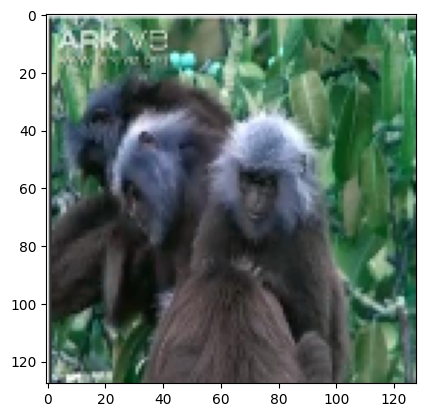

In [ ]:
n = 5
plt.imshow(rgb_images[n])

# Exploratory Data Analysis

This function, `plot_images`, randomly selects images from a dataset and displays them in a 3x4 grid. It retrieves corresponding labels from a dictionary and sets them as titles for each image.

In [ ]:
def plot_images(images,labels):
    keys=dict(labels['Label'])
    rows = 3
    cols = 4
    fig = plt.figure(figsize=(10, 8))
    for i in range(cols):
        for j in range(rows):
            random_index = np.random.randint(0, len(labels))
            ax = fig.add_subplot(rows, cols, i * rows + j + 1)
            ax.imshow(images[random_index, :])
            ax.set_title(keys[random_index])
    plt.show()

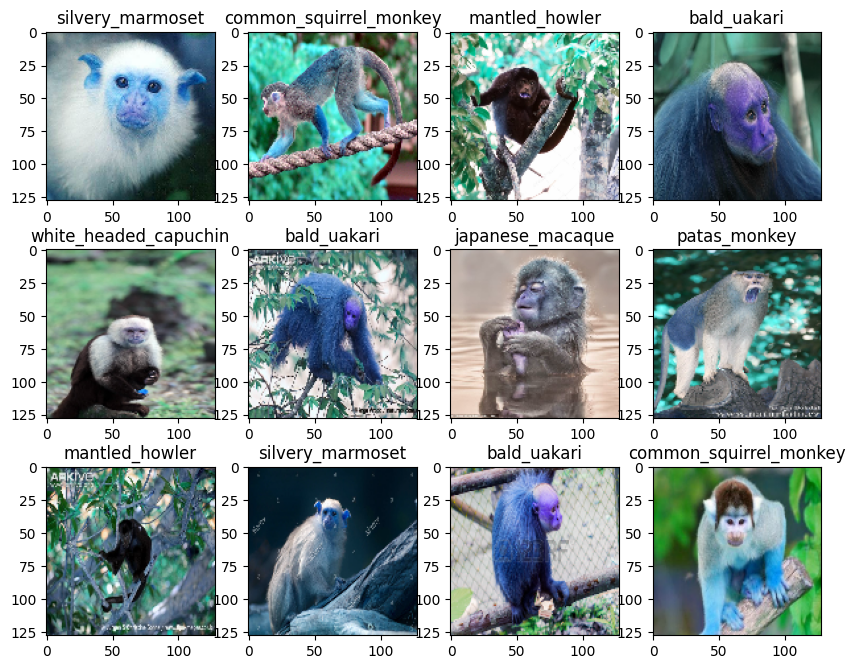

In [ ]:
plot_images(rgb_images,labels)

### Checking for class imbalance

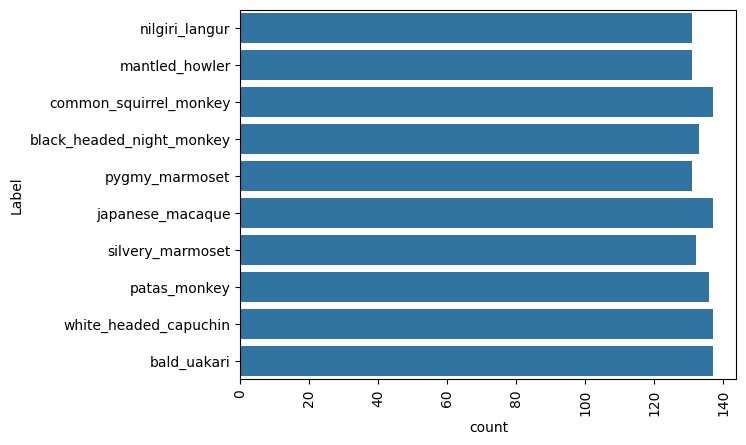

In [ ]:
 sns.countplot(labels['Label'])
 plt.xticks(rotation='vertical');

- As you can see from the above plot, the dataset is quite balanced.
- There are about 135 images in each category

# Data Preprocessing

We define a function, ***`grid_plot`***, to display two images side by side: the original image and its processed version. It helps visually compare the effects of image processing techniques.

**Inputs:**

- `img1`: The original image.

- `img2`: The processed image

- `gray` (optional, default: False): If True, displays the processed image in grayscale.

**Output:**
- The original image displayed on the left and the processed image on the right.


In [ ]:
# Function to plot the original and processed images side by side
def grid_plot(img1,img2,gray=False):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].imshow(img1)
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    if gray:
      axes[1].imshow(img2,cmap='gray')
    else:
      axes[1].imshow(img2)
    axes[1].set_title('Processed Image')
    axes[1].axis('off')

    plt.show()

## Grayscale

In [ ]:
gray_images = []
for i in range(len(rgb_images)):
  gray_images.append(cv2.cvtColor(rgb_images[i], cv2.COLOR_RGB2GRAY))

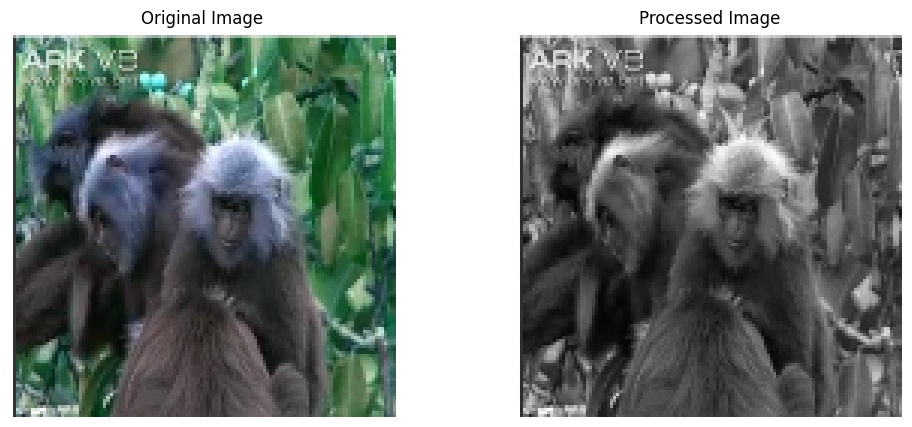

In [ ]:
# choosing an image
n = 5
# plotting the original and preprocessed image
grid_plot(rgb_images[n],gray_images[n],gray=True)

- As expected, the RGB component is removed.  

- If the species are not distinguished based on color, then this feature will be highly beneficial as it also reduces computational requirements.

## Gaussian blur

In [ ]:
gaus_blur_images = []
for i in range(len(gray_images)):
  gaus_blur_images.append(cv2.GaussianBlur(rgb_images[i], (3,3), 0))

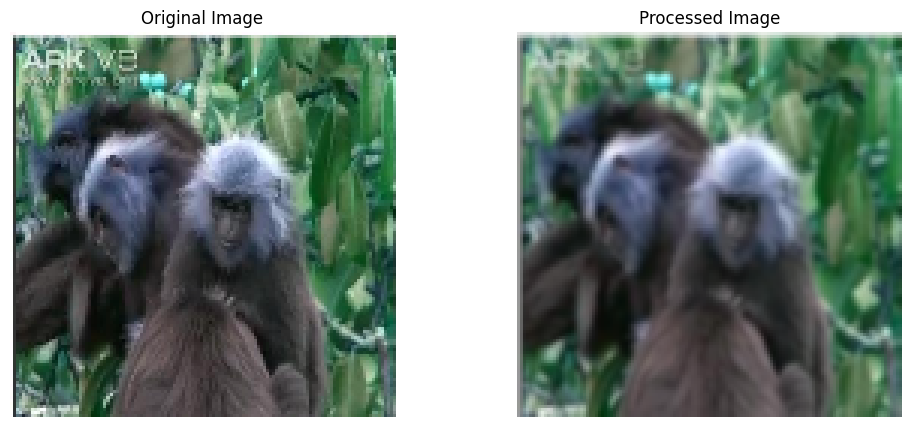

In [ ]:
# choosing an image
n = 5
# plotting the original and preprocessed image
grid_plot(rgb_images[n],gaus_blur_images[n])

- The Gaussian blur provides a smoothing effect.

- This will be useful if the images are too sharp, as it also helps reduce noise.

## Laplacian Filter

Instead of using the original RGB images, we'll be applying the Laplacian filter on the grayscale images as

- Grayscale images have only one intensity channel, making it straightforward to apply the Laplacian operator without dealing with color channel complexities.
- Laplacian filtering relies on detecting changes in pixel intensity, which is directly represented in grayscale images.
- Applying Laplacian on grayscale avoids color noise amplification, leading to clearer edge detection results compared to noisy outputs from color images.

In [ ]:
edge_images = []
for i in range(len(gray_images)):
    edge_images.append(cv2.Laplacian(gray_images[i],cv2.CV_64F))

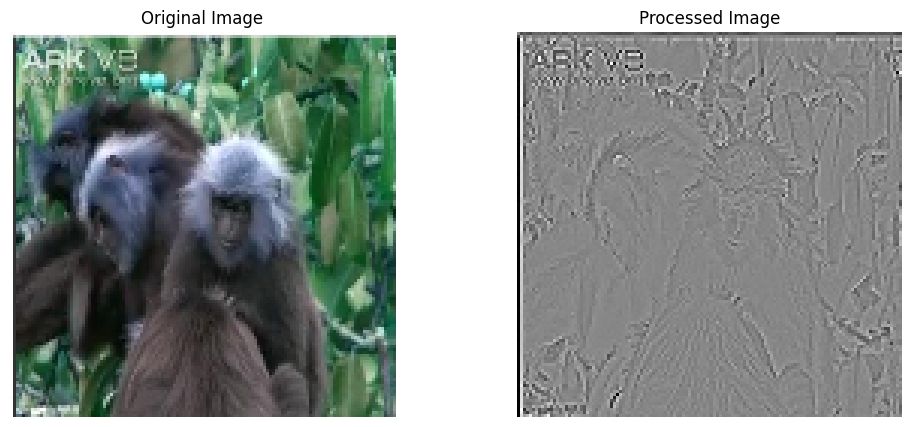

In [ ]:
# choosing an image
n = 5
# plotting the original and preprocessed image
grid_plot(rgb_images[n],edge_images[n],gray=True)

- Based on this, the edge feature does not appear to be useful.

- It is also capturing the background. If we isolate the monkey from the background, this feature might become useful.

## Splitting the dataset

In [ ]:
# Splitting the dataset into training (80%) and temporary (20%) sets
# stratify=labels ensures that class distribution is maintained in both sets
X_train_rgb, X_temp_rgb, y_train_rgb, y_temp_rgb = train_test_split(np.array(rgb_images),labels , test_size=0.2, random_state=42,stratify=labels)
# Splitting the temporary set further into validation (50%) and test (50%) sets
# This results in 10% validation and 10% test data from the original dataset
X_val_rgb, X_test_rgb, y_val_rgb, y_test_rgb = train_test_split(X_temp_rgb,y_temp_rgb , test_size=0.5, random_state=42,stratify=y_temp_rgb)

In [ ]:
# Splitting the dataset into training (80%) and temporary (20%) sets
# stratify=labels ensures that class distribution is maintained in both sets
X_train_gray, X_temp_gray, y_train, y_temp = train_test_split(np.array(gray_images),labels , test_size=0.2, random_state=42,stratify=labels)
# Splitting the temporary set further into validation (50%) and test (50%) sets
# This results in 10% validation and 10% test data from the original dataset
X_val_gray, X_test_gray, y_val, y_test = train_test_split(X_temp_gray,y_temp , test_size=0.5, random_state=42,stratify=y_temp)

In [ ]:
# Splitting the dataset into training (80%) and temporary (20%) sets
# stratify=labels ensures that class distribution is maintained in both sets
X_train_blur, X_temp_blur, y_train_blur, y_temp_blur = train_test_split(np.array(gaus_blur_images),labels , test_size=0.2, random_state=42,stratify=labels)
# Splitting the temporary set further into validation (50%) and test (50%) sets
# This results in 10% validation and 10% test data from the original dataset
X_val_blur, X_test_blur, y_val_blur, y_test_blur = train_test_split(X_temp_blur,y_temp_blur,test_size=0.5, random_state=42,stratify=y_temp_blur)

In [ ]:
# Splitting the dataset into training (80%) and temporary (20%) sets
# stratify=labels ensures that class distribution is maintained in both sets
X_train_edge, X_temp_edge, y_train_edge, y_temp_edge = train_test_split(np.array(edge_images),labels , test_size=0.2, random_state=42,stratify=labels)
# Splitting the temporary set further into validation (50%) and test (50%) sets
# This results in 10% validation and 10% test data from the original dataset
X_val_edge, X_test_edge, y_val_edge, y_test_edge = train_test_split(X_temp_edge,y_temp_edge,test_size=0.5, random_state=42,stratify=y_temp_edge)

## Encoding the target labels

- Convert labels from categories to one hot vectors

- `LabelBinarizer` is a preprocessing utility in `sklearn.preprocessing` that converts categorical labels into a binary (one-hot) representation.

  - It is useful for transforming multi-class labels into a format suitable for models that require numerical input.

  - `fit_transform()` learns the unique classes from the data and converts labels into a binary format in one step.

  - `transform()` converts new data using the already learned classes without refitting.


In [ ]:
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train_rgb)
y_val_encoded = enc.transform(y_val_rgb)
y_test_encoded = enc.transform(y_test_rgb)

In [ ]:
print(y_train_encoded[0])

[1 0 0 0 0 0 0 0 0 0]


## Data Normalization

Since the **image pixel values range from 0-255**, our method of normalization here will be **scaling** - we shall **divide all the pixel values by 255 to standardize the images to have values between 0-1.**

In [ ]:
# Normalizing the image pixels
X_train_rgb = X_train_rgb.astype('float32')/255.0
X_val_rgb = X_val_rgb.astype('float32')/255.0
X_test_rgb = X_test_rgb.astype('float32')/255.0

In [ ]:
# Normalizing the image pixels
X_train_gray = X_train_gray.astype('float32')/255.0
X_val_gray = X_val_gray.astype('float32')/255.0
X_test_gray = X_test_gray.astype('float32')/255.0

In [ ]:
# Normalizing the image pixels
X_train_blur = X_train_blur.astype('float32')/255.0
X_val_blur = X_val_blur.astype('float32')/255.0
X_test_blur = X_test_blur.astype('float32')/255.0

In [ ]:
# Normalizing the image pixels
X_train_edge = X_train_edge.astype('float32')/255.0
X_val_edge = X_val_edge.astype('float32')/255.0
X_test_edge = X_test_edge.astype('float32')/255.0

# Model Building

## Utility Functions

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    pred = model.predict(predictors).argmax(axis=1)

    target = target.argmax(axis=1)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame({"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},index=[0],)

    return df_perf

In [ ]:
def plot_confusion_matrix(model,predictors,target):
    """
    Function to plot the confusion matrix

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    pred = model.predict(predictors).argmax(axis=1)

    target = target.argmax(axis=1)

    # Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
    confusion_matrix = tf.math.confusion_matrix(target,pred)
    f, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(
        confusion_matrix,
        annot=True,
        linewidths=.4,
        fmt="d",
        square=True,
        ax=ax
    )
    plt.show()

## ANN with RGB Images

In [ ]:
num_classes = labels['Label'].nunique()
image_size = X_train_rgb[0].size
shape = X_train_rgb.shape[1:]

In [ ]:
model_1 = Sequential()
model_1.add(Input(shape=(shape[0],shape[1],shape[2])))
model_1.add(Flatten())
model_1.add(Dense(256, activation='relu',kernel_initializer='he_uniform',input_shape=(image_size,)))
model_1.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))
model_1.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model_1.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))

model_1.add(Dense(num_classes, activation='softmax'))

In [ ]:
adam = optimizers.Adam()
model_1.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])

In [ ]:
model_1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 49152)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │    12,583,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,626,730 (48.17 MB)

 Trainable params: 12,626,730 (48.17 MB)

 Non-trainable params: 0 (0.00 B)

Efficiently iterating over image data is crucial for training deep learning models, especially when working with large datasets.
Keras provides the `ImageDataGenerator` class to handle real-time data loading and augmentation during model training.

- `ImageDataGenerator` in Keras is used to efficiently load and iterate over image datasets during model training.

  - The `flow()` function generates batches of images from in-memory NumPy arrays (X, y), providing a convenient way to feed data into a neural network.

In [ ]:
train_datagen = ImageDataGenerator()

In [ ]:
history_1 = model_1.fit(train_datagen.flow(X_train_rgb,y_train_encoded,batch_size=128),validation_data = (X_val_rgb,y_val_encoded),epochs=20, verbose=2)

Epoch 1/20
9/9 - 6s - 679ms/step - accuracy: 0.1044 - loss: 10.8240 - val_accuracy: 0.0970 - val_loss: 11.2037
Epoch 2/20
9/9 - 10s - 1s/step - accuracy: 0.1165 - loss: 10.1938 - val_accuracy: 0.0970 - val_loss: 5.4917
Epoch 3/20
9/9 - 9s - 953ms/step - accuracy: 0.1538 - loss: 3.7838 - val_accuracy: 0.1269 - val_loss: 2.7953
Epoch 4/20
9/9 - 4s - 476ms/step - accuracy: 0.1342 - loss: 2.6462 - val_accuracy: 0.3134 - val_loss: 2.1257
Epoch 5/20
9/9 - 3s - 340ms/step - accuracy: 0.2964 - loss: 2.1122 - val_accuracy: 0.2687 - val_loss: 2.0783
Epoch 6/20
9/9 - 4s - 483ms/step - accuracy: 0.2591 - loss: 2.0744 - val_accuracy: 0.2388 - val_loss: 2.0173
Epoch 7/20
9/9 - 3s - 336ms/step - accuracy: 0.3159 - loss: 1.8975 - val_accuracy: 0.3507 - val_loss: 1.7851
Epoch 8/20
9/9 - 3s - 339ms/step - accuracy: 0.3504 - loss: 1.7954 - val_accuracy: 0.3955 - val_loss: 1.8030
Epoch 9/20
9/9 - 3s - 354ms/step - accuracy: 0.3979 - loss: 1.7367 - val_accuracy: 0.3731 - val_loss: 1.7962
Epoch 10/20
9/9 - 

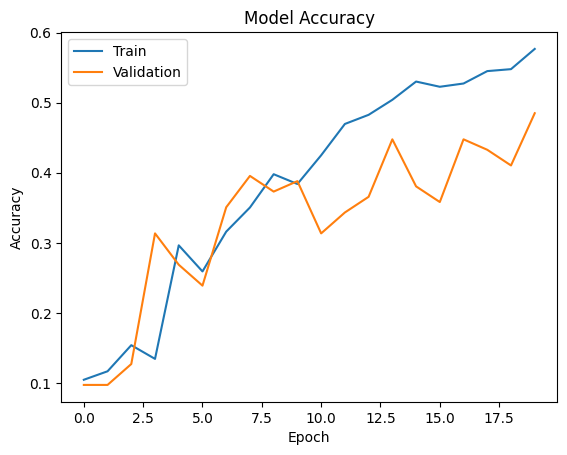

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model_1_train_perf = model_performance_classification(model_1, X_train_rgb,y_train_encoded)

print("Train performance metrics")
print(model_1_train_perf)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
Train performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.643057  0.643057   0.690217  0.639495


In [ ]:
model_1_valid_perf = model_performance_classification(model_1, X_val_rgb,y_val_encoded)

print("Validation performance metrics")
print(model_1_valid_perf)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Validation performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.485075  0.485075   0.561073  0.481543


34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step


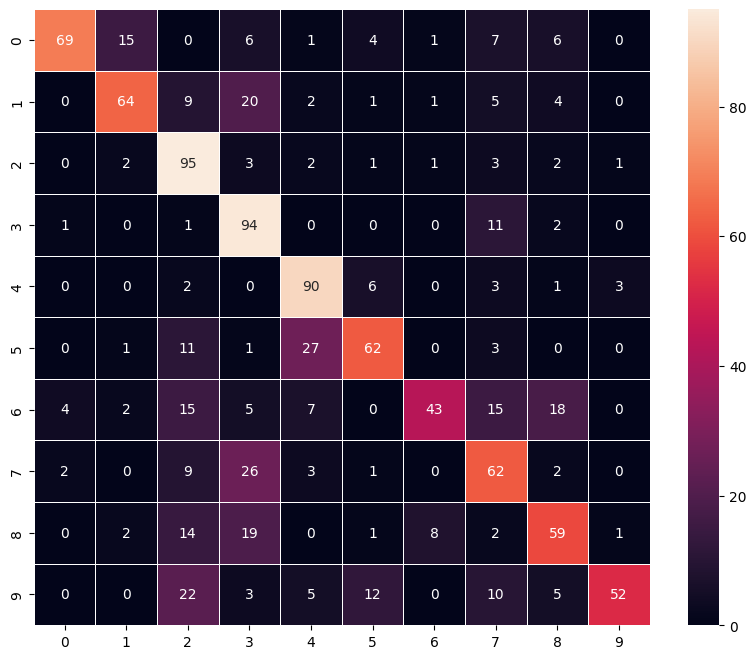

In [ ]:
plot_confusion_matrix(model_1,X_train_rgb,y_train_encoded)

The accuracy on the training set is ~ 64% and the validation accuracy is ~ 48%.

## ANN with Grayscale Images

In [ ]:
num_classes = labels['Label'].nunique()
X_train_gray = np.expand_dims(X_train_gray,axis=-1)
X_val_gray = np.expand_dims(X_val_gray, axis=-1)
image_size = X_train_gray[0].size
shape = X_train_gray.shape[1:]

In [ ]:
X_val_gray.shape

(134, 128, 128, 1)

In [ ]:
X_train_gray.shape

(1073, 128, 128, 1)

In [ ]:
model_2 = Sequential()
model_2.add(Input(shape=(shape[0],shape[1],shape[2])))
model_2.add(Flatten())
model_2.add(Dense(256, activation='relu',kernel_initializer='he_uniform',input_shape=(image_size,)))
model_2.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))
model_2.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model_2.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))

model_2.add(Dense(num_classes, activation='softmax'))

In [ ]:
adam = optimizers.Adam()
model_2.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])

In [ ]:
model_2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │     4,194,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,238,122 (16.17 MB)

 Trainable params: 4,238,122 (16.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
train_datagen = ImageDataGenerator()

In [ ]:
history_2 = model_2.fit(train_datagen.flow(X_train_gray,y_train_encoded,batch_size=128),validation_data = (X_val_gray,y_val_encoded),epochs=20, verbose=2)

Epoch 1/20
9/9 - 3s - 312ms/step - accuracy: 0.1081 - loss: 4.8309 - val_accuracy: 0.1119 - val_loss: 3.2190
Epoch 2/20
9/9 - 1s - 100ms/step - accuracy: 0.1883 - loss: 2.4863 - val_accuracy: 0.2015 - val_loss: 2.1875
Epoch 3/20
9/9 - 1s - 140ms/step - accuracy: 0.2088 - loss: 2.1567 - val_accuracy: 0.2313 - val_loss: 2.1341
Epoch 4/20
9/9 - 1s - 99ms/step - accuracy: 0.2283 - loss: 2.1233 - val_accuracy: 0.2313 - val_loss: 2.0724
Epoch 5/20
9/9 - 1s - 95ms/step - accuracy: 0.2311 - loss: 2.0894 - val_accuracy: 0.2388 - val_loss: 2.1332
Epoch 6/20
9/9 - 1s - 141ms/step - accuracy: 0.2535 - loss: 2.0734 - val_accuracy: 0.2612 - val_loss: 2.0609
Epoch 7/20
9/9 - 1s - 139ms/step - accuracy: 0.2703 - loss: 2.0402 - val_accuracy: 0.2463 - val_loss: 2.0556
Epoch 8/20
9/9 - 1s - 114ms/step - accuracy: 0.2414 - loss: 2.0615 - val_accuracy: 0.2463 - val_loss: 2.0631
Epoch 9/20
9/9 - 2s - 177ms/step - accuracy: 0.2777 - loss: 1.9866 - val_accuracy: 0.2239 - val_loss: 2.0921
Epoch 10/20
9/9 - 2s 

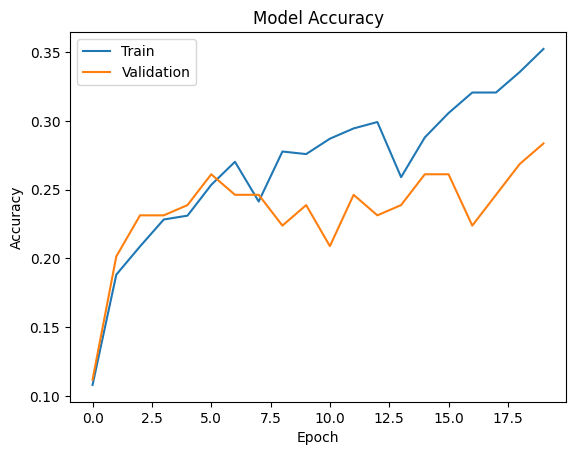

In [ ]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model_2_train_perf = model_performance_classification(model_2, X_train_gray,y_train_encoded)

print("Train performance metrics")
print(model_2_train_perf)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Train performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.378378  0.378378   0.317699  0.332165


In [ ]:
model_2_valid_perf = model_performance_classification(model_2, X_val_gray,y_val_encoded)

print("Validation performance metrics")
print(model_2_valid_perf)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Validation performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.283582  0.283582    0.25963  0.252757


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


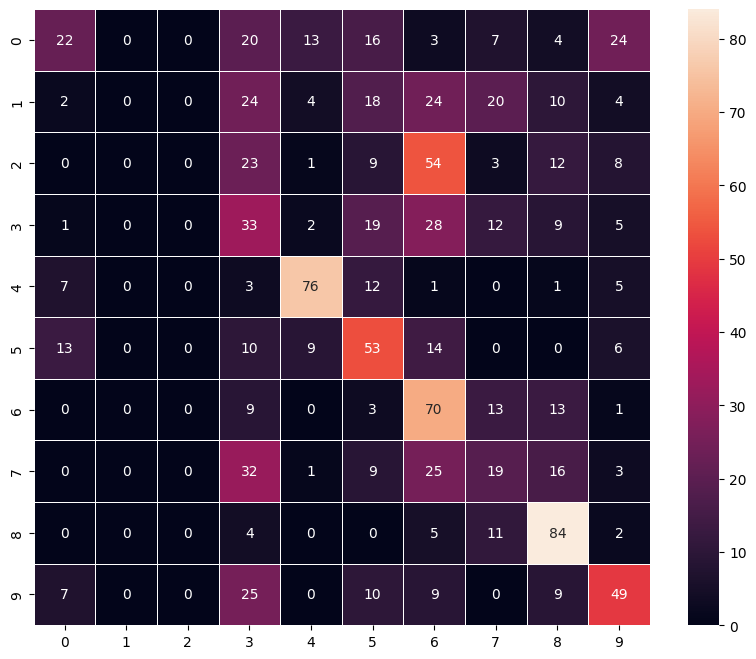

In [ ]:
plot_confusion_matrix(model_2,X_train_gray,y_train_encoded)

- The accuracy on both the training and validation sets is poor.  

- This suggests that the color component plays a crucial role in distinguishing monkey species.

## ANN with Gaussian-blurred Images

In [ ]:
num_classes = labels['Label'].nunique()

image_size = X_train_blur[0].size
shape = X_train_blur.shape[1:]

In [ ]:
model_3 = Sequential()
model_3.add(Input(shape=(shape[0],shape[1],shape[2])))
model_3.add(Flatten())
model_3.add(Dense(256, activation='relu',kernel_initializer='he_uniform',input_shape=(image_size,)))
model_3.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))
model_3.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model_3.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))

model_3.add(Dense(num_classes, activation='softmax'))

In [ ]:
adam = optimizers.Adam()
model_3.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])

In [ ]:
model_3.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 49152)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 256)            │    12,583,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,626,730 (48.17 MB)

 Trainable params: 12,626,730 (48.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
train_datagen = ImageDataGenerator()

In [ ]:
history_3 = model_3.fit(train_datagen.flow(X_train_blur,y_train_encoded,batch_size=128),validation_data = (X_val_blur,y_val_encoded),epochs=20, verbose=2)

Epoch 1/20
9/9 - 7s - 804ms/step - accuracy: 0.1109 - loss: 14.5688 - val_accuracy: 0.1045 - val_loss: 8.0593
Epoch 2/20
9/9 - 3s - 347ms/step - accuracy: 0.1081 - loss: 6.6469 - val_accuracy: 0.1343 - val_loss: 2.2737
Epoch 3/20
9/9 - 6s - 624ms/step - accuracy: 0.1072 - loss: 2.3006 - val_accuracy: 0.0970 - val_loss: 2.3034
Epoch 4/20
9/9 - 4s - 415ms/step - accuracy: 0.1044 - loss: 2.3057 - val_accuracy: 0.0970 - val_loss: 2.3029
Epoch 5/20
9/9 - 3s - 353ms/step - accuracy: 0.0979 - loss: 2.3028 - val_accuracy: 0.0970 - val_loss: 2.3029
Epoch 6/20
9/9 - 4s - 459ms/step - accuracy: 0.0979 - loss: 2.3028 - val_accuracy: 0.0970 - val_loss: 2.3029
Epoch 7/20
9/9 - 9s - 945ms/step - accuracy: 0.0979 - loss: 2.3028 - val_accuracy: 0.0970 - val_loss: 2.3029
Epoch 8/20
9/9 - 13s - 1s/step - accuracy: 0.0979 - loss: 2.3028 - val_accuracy: 0.0970 - val_loss: 2.3028
Epoch 9/20
9/9 - 5s - 512ms/step - accuracy: 0.0979 - loss: 2.3027 - val_accuracy: 0.0970 - val_loss: 2.3028
Epoch 10/20
9/9 - 3s

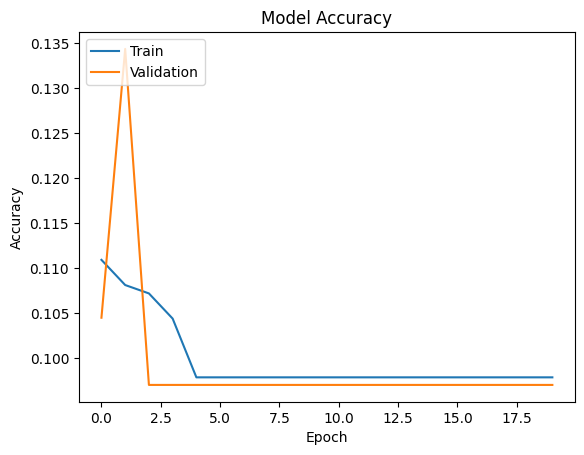

In [ ]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model_3_train_perf = model_performance_classification(model_3, X_train_blur,y_train_encoded)

print("Train performance metrics")
print(model_3_train_perf)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
Train performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.097856  0.097856   0.009576  0.017445


In [ ]:
model_3_valid_perf = model_performance_classification(model_3, X_val_blur,y_val_encoded)

print("Validation performance metrics")
print(model_3_valid_perf)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Validation performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.097015  0.097015   0.009412  0.017159


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


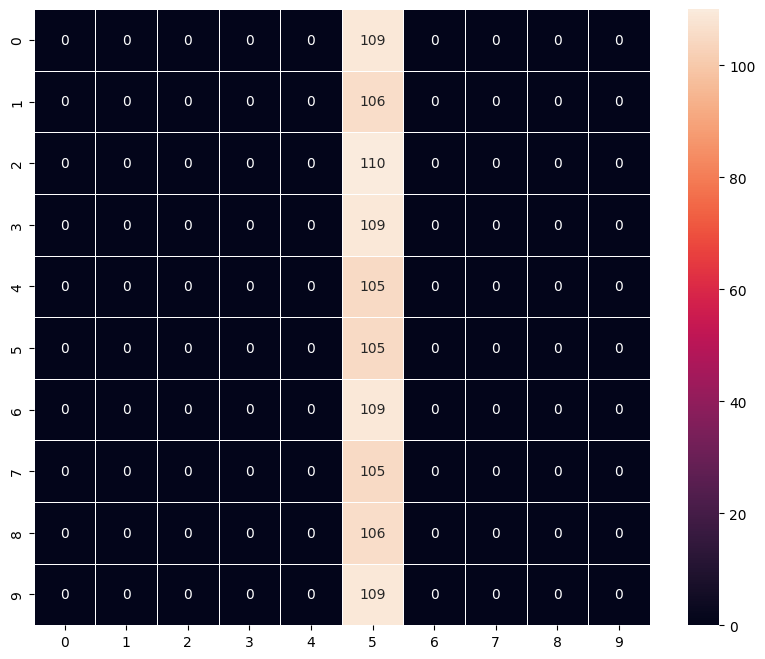

In [ ]:
plot_confusion_matrix(model_3,X_train_blur,y_train_encoded)

- The smoothing effect doesn't improve accuracy significantly. One possible reason is that it may blur important details, such as the eyes.

## ANN with Laplacian-Filtered Image

In [ ]:
num_classes = labels['Label'].nunique()
X_train_edge = np.expand_dims(X_train_edge,axis=-1)
X_val_edge = np.expand_dims(X_val_edge,axis=-1)
image_size = X_train_edge[0].size
shape = X_train_edge.shape[1:]

In [ ]:
model_4 = Sequential()
model_4.add(Input(shape=(shape[0],shape[1],shape[2])))
model_4.add(Flatten())
model_4.add(Dense(256, activation='relu',kernel_initializer='he_uniform',input_shape=(image_size,)))
model_4.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))
model_4.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model_4.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))

model_4.add(Dense(num_classes, activation='softmax'))

In [ ]:
adam = optimizers.Adam()
model_4.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])

In [ ]:
model_4.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 256)            │     4,194,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,238,122 (16.17 MB)

 Trainable params: 4,238,122 (16.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
train_datagen = ImageDataGenerator()

In [ ]:
history_4 = model_4.fit(train_datagen.flow(X_train_edge,y_train_encoded,batch_size=128),validation_data = (X_val_edge,y_val_encoded),epochs=20, verbose=2)

Epoch 1/20
9/9 - 5s - 540ms/step - accuracy: 0.1286 - loss: 2.2749 - val_accuracy: 0.2687 - val_loss: 2.0996
Epoch 2/20
9/9 - 3s - 342ms/step - accuracy: 0.6850 - loss: 1.3188 - val_accuracy: 0.2761 - val_loss: 1.9851
Epoch 3/20
9/9 - 1s - 104ms/step - accuracy: 0.9189 - loss: 0.6018 - val_accuracy: 0.2985 - val_loss: 2.0115
Epoch 4/20
9/9 - 1s - 140ms/step - accuracy: 0.9907 - loss: 0.1982 - val_accuracy: 0.2910 - val_loss: 2.1288
Epoch 5/20
9/9 - 1s - 151ms/step - accuracy: 1.0000 - loss: 0.0450 - val_accuracy: 0.3209 - val_loss: 2.2705
Epoch 6/20
9/9 - 2s - 168ms/step - accuracy: 1.0000 - loss: 0.0133 - val_accuracy: 0.3060 - val_loss: 2.3778
Epoch 7/20
9/9 - 3s - 364ms/step - accuracy: 1.0000 - loss: 0.0054 - val_accuracy: 0.2985 - val_loss: 2.4462
Epoch 8/20
9/9 - 2s - 230ms/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 0.2985 - val_loss: 2.4824
Epoch 9/20
9/9 - 1s - 98ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 0.2985 - val_loss: 2.5024
Epoch 10/20
9/9 - 1s

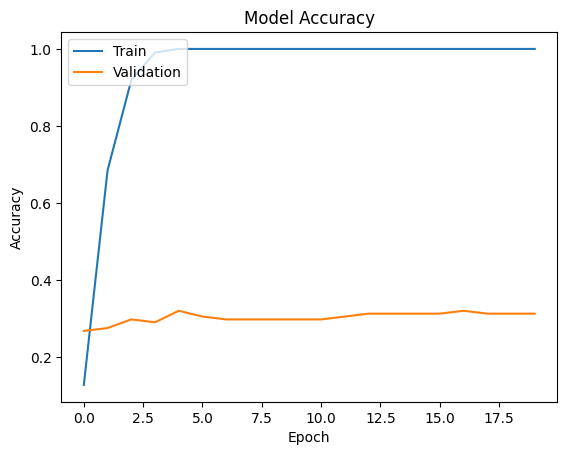

In [ ]:
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model_4_train_perf = model_performance_classification(model_4, X_train_edge,y_train_encoded)

print("Train performance metrics")
print(model_4_train_perf)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
Train performance metrics
   Accuracy  Recall  Precision  F1 Score
0       1.0     1.0        1.0       1.0


In [ ]:
model_4_valid_perf = model_performance_classification(model_4, X_val_edge,y_val_encoded)

print("Validation performance metrics")
print(model_4_valid_perf)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Validation performance metrics
   Accuracy    Recall  Precision  F1 Score
0  0.313433  0.313433    0.34599  0.306897


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


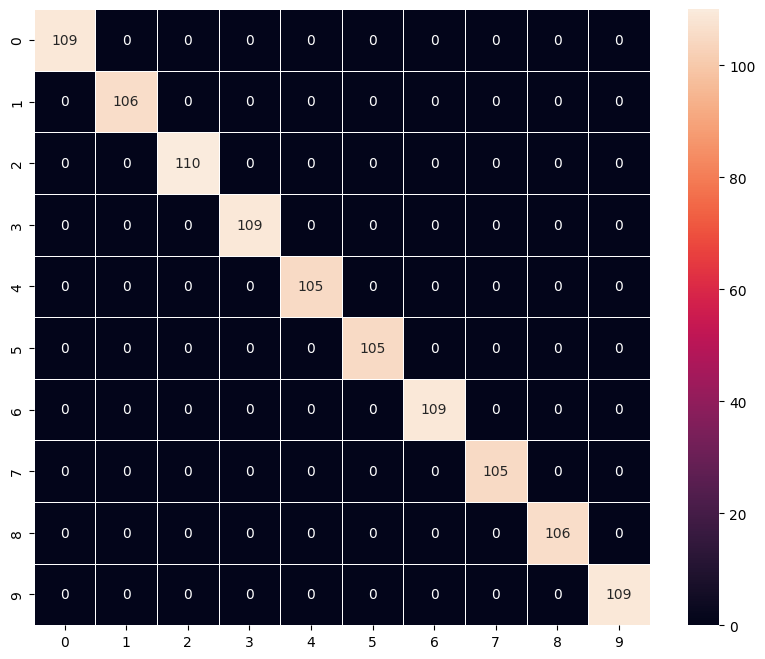

In [ ]:
plot_confusion_matrix(model_4,X_train_edge,y_train_encoded)

- With the edge feature, the model has achieved a perfect score on the training set.  

- However, on the validation set, it has achieved only 32% accuracy, indicating severe overfitting.  

- Since edge-level features are basic, the model has merely memorized them, effectively turning species prediction into a lookup table.

# Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "ANN with RGB Images","ANN with Grayscale Images","ANN with Gaussian-blurred Images","ANN with Laplacian-Filtered Image"
]

In [ ]:
models_valid_comp_df = pd.concat(
    [
        model_1_valid_perf.T,
        model_2_valid_perf.T,
        model_3_valid_perf.T,
        model_4_valid_perf.T

    ],
    axis=1,
)
models_valid_comp_df.columns = [
 "ANN with RGB Images","ANN with Grayscale Images","ANN with Gaussian-blurred Images","ANN with Laplacian-Filtered Image"
]

In [ ]:
models_train_comp_df

,ANN with RGB Images,ANN with Grayscale Images,ANN with Gaussian-blurred Images,ANN with Laplacian-Filtered Image
Accuracy,0.643057,0.378378,0.097856,1.0
Recall,0.643057,0.378378,0.097856,1.0
Precision,0.690217,0.317699,0.009576,1.0
F1 Score,0.639495,0.332165,0.017445,1.0


In [ ]:
models_valid_comp_df

,ANN with RGB Images,ANN with Grayscale Images,ANN with Gaussian-blurred Images,ANN with Laplacian-Filtered Image
Accuracy,0.485075,0.283582,0.097015,0.313433
Recall,0.485075,0.283582,0.097015,0.313433
Precision,0.561073,0.259630,0.009412,0.345990
F1 Score,0.481543,0.252757,0.017159,0.306897


In [ ]:
models_train_comp_df - models_valid_comp_df

,ANN with RGB Images,ANN with Grayscale Images,ANN with Gaussian-blurred Images,ANN with Laplacian-Filtered Image
Accuracy,0.157982,0.094796,0.000842,0.686567
Recall,0.157982,0.094796,0.000842,0.686567
Precision,0.129144,0.058069,0.000164,0.654010
F1 Score,0.157952,0.079408,0.000286,0.693103


- We observe that the ANN with edge features has achieved a perfect accuracy score on the training set, but only ~ 32% on the validation set.  
  - This suggests that either the model is overfitting or the edge feature is not effective for generalization.  

- The ANN with the RGB feature has achieved an accuracy of ~ 64% on the training set and ~ 48% on the validation set. The smaller gap indicates that the color feature is useful in distinguishing monkey species.  

- For the other two features, the accuracy score is below 50%, which is poor.

Considering this, we should select the model trained on RGB features as the best option, as it demonstrates a better balance between training and validation performance, indicating its effectiveness in distinguishing monkey species.

## Test Performance

In [ ]:
model_1_test_perf = model_performance_classification(model_1,X_test_rgb,y_test_encoded)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [ ]:
model_1_test_perf

,Accuracy,Recall,Precision,F1 Score
0,0.414815,0.414815,0.493802,0.411395


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


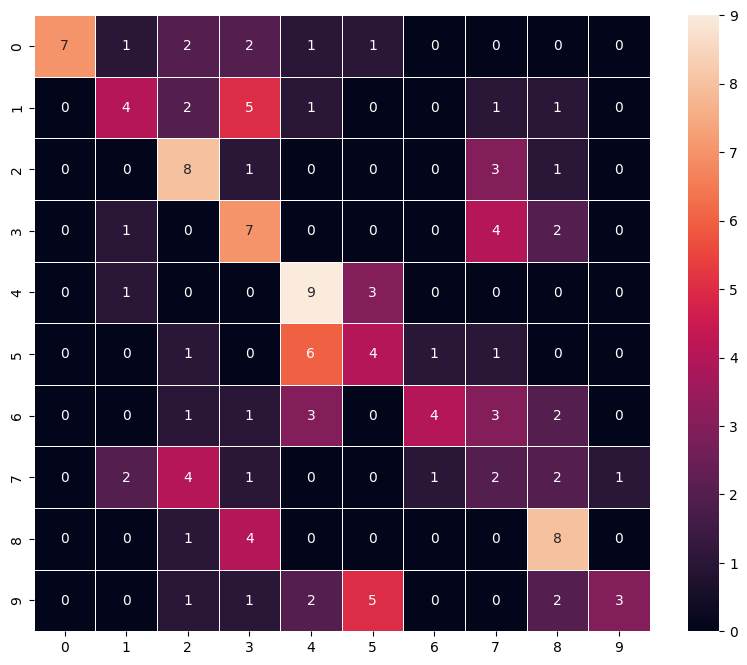

In [ ]:
plot_confusion_matrix(model_1, X_test_rgb,y_test_encoded)

#  Business Insights and Recommendations

- The ANN trained on RGB features demonstrates the best performance, making color a key distinguishing factor for monkey species.  
- Edge-based features cause overfitting, indicating they are ineffective without additional processing like background removal.  
- Features other than RGB and edges yield poor accuracy (<0.5), suggesting they lack sufficient distinguishing power.  
- Deploy the RGB-based model as the primary solution for species classification.  
- If edge features are to be used, implement preprocessing techniques such as background isolation to improve generalization.  
- Optimize the model for real-time classification by exploring lightweight architectures to reduce computational costs.  
- Investigate additional feature engineering approaches, such as texture or shape analysis, to enhance model robustness.

<font size=4> **Note:** This week, we used ANN to classify images, but it's not the most effective approach since ANN cannot fully capture the unique properties of images. Next week, we'll tackle the same business problem using CNN, which is better suited for image processing. More to come next week! </font>

<font size=5 color='blue'>Power Ahead!</font>
___